# Proyecto: 
## Investigación de la base de datos de películas de TMDb


### Introducción
En este proyecto de análisis de datos, exploraremos un archivo de base de datos de películas de TMDb, que cuenta con información importante de más de 10.000 películas, incluyendo detalles sobre presupuesto, ingresos, fechas de estreno, entre otros.

A lo largo de este análisis, utilizaremos diferentes herramientas y técnicas para explorar, visualizar y entender mejor los datos que contiene esta base de datos de películas. Exploraremos preguntas como ¿cuáles son las películas más populares? ¿Cuál es la relación entre el presupuesto y los ingresos de una película? ¿Cómo ha evolucionado la industria cinematográfica a lo largo del tiempo?

¡Prepárate para sumergirte en el mundo del cine y el análisis de datos con nosotros!

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

**Base de Datos 1**

In [5]:

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

pd.set_option("display.max_columns", None) # Ajustar el ancho de las columnas
print(movie_data.head(5))


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

Tipos de datos que tenemos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

print(movie_data.dtypes)


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


Ver la cantidad de datos que tenemos

In [ ]:
rows, col = movie_data.shape
print('En total hay {} peliculas y {} columnas en esta base.'.format(rows-1, col))


En total hay 10865 peliculas y 21 columnas en esta base.


Ver que columnas tienen mayor cantidad de nulls

<Axes: >

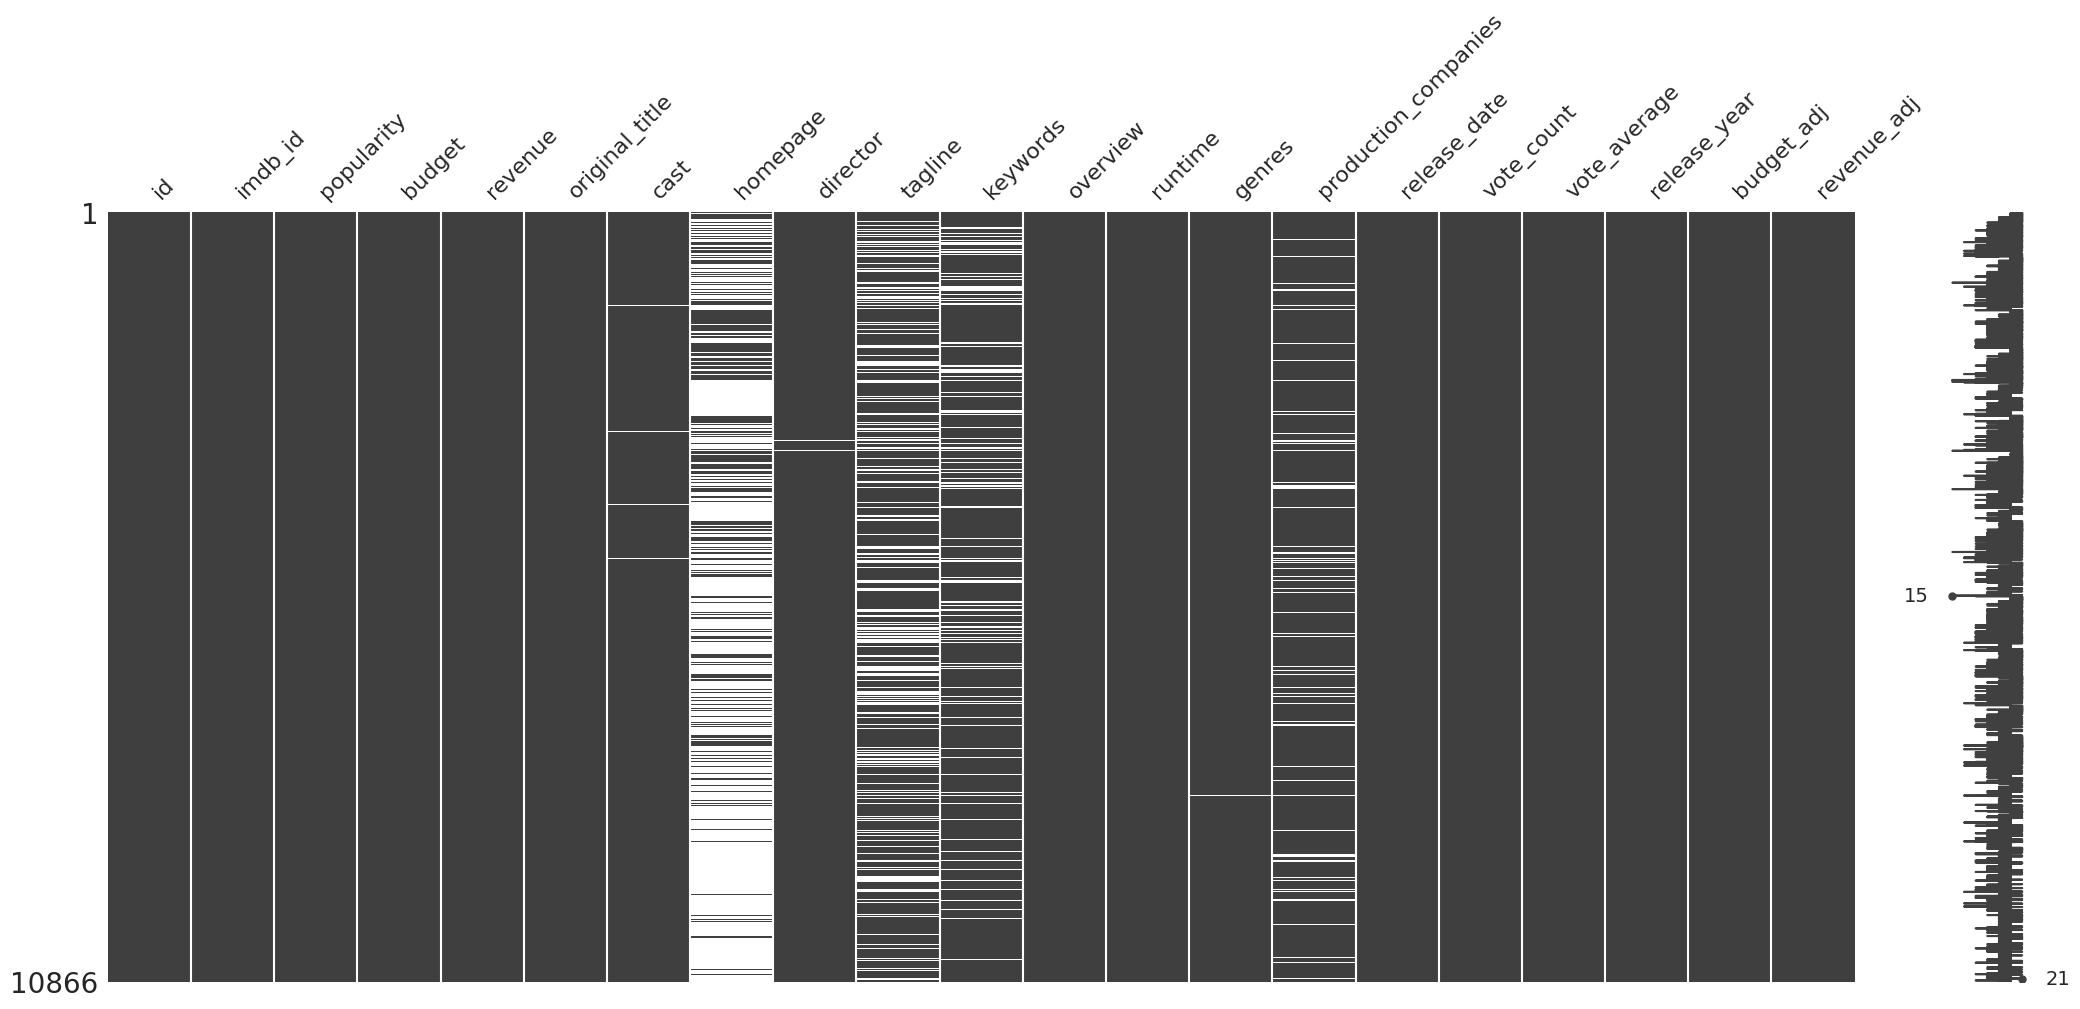

In [ ]:
import pandas as pd
import missingno as msno

url = "https://raw.githubusercontent.com/JuzerShakir/Investigate_TMDb_Movies/master/data.csv"
movie_data = pd.read_csv(url, encoding="utf-8")

msno.matrix(movie_data)


Realizo un analisis de las variables.


In [ ]:
import markdown
with open('movie_data_report.html', 'r') as html_file:
    html_content = html_file.read()
markdown_content = markdown.markdown(html_content)
print(markdown_content)

Elimino 3 columnas que tienen demasiados nulls y que no soy útiles para el trabajo

In [6]:
movie_data = movie_data.drop(['homepage', 'tagline', 'keywords'], axis=1)


Realizamos limpieza de la base

In [7]:
#Eliminamos los duplicados, dejando solo el primero
movie_data.drop_duplicates(keep = 'first', inplace = True)




****Base de Datos 2 (complementaria)**

In [3]:
df = pd.read_csv('movies.csv')
df.head(5)

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,NaN
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,NaN
4,Daman,2022,121,NaN,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",9.1,NaN,13372,NaN


**Limpieza y Transformación de Datos**

In [4]:
# Filtra el DataFrame para eliminar los años especificados
years_to_remove = ['1915', '1916', '1917', '1918', '1919', "2021", "2022", "2023"]
df = df[~df['year'].isin(years_to_remove)]

# 1. Elimina caracteres no numéricos de una cadena en la columna 'year'
def remove_non_numeric_characters(string):
    return re.sub('[^0-9]', '', string)

# Aplica la función 'remove_non_numeric_characters' a la columna 'year'
df['year'] = df['year'].apply(remove_non_numeric_characters)

# 2. Calcula la mediana de los ingresos ('gross') para cada 'año' único
median_revenue_by_year = df.groupby('year')['gross'].median()

# 3. Itera a través del DataFrame para llenar los valores faltantes de ingresos 'gross'
for index, row in df.iterrows():
    if pd.isnull(row['gross']):
        df.at[index, 'gross'] = median_revenue_by_year.get(row['year'], None)

# Muestra las primeras filas del DataFrame modificado
df.head()

,title,year,runtime,certificate,genre,director,stars,rating,metascore,votes,gross
0,The Shawshank Redemption,1994,142,R,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",9.3,82.0,2780534,28.34
1,The Godfather,1972,175,R,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",9.2,100.0,1935895,134.97
2,Ramayana: The Legend of Prince Rama,1993,135,PG,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",9.2,NaN,12470,24.76
3,The Chaos Class,1975,87,NaN,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",9.2,NaN,42018,12.48
5,The Dark Knight,2008,152,PG-13,"Action, Crime, Drama","['Christopher Nolan', 'Christian Bale', 'Heath...","['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",9.0,84.0,2758250,534.86


**Evolución Anual del Número de Películas Lanzadas (1915-2022)**

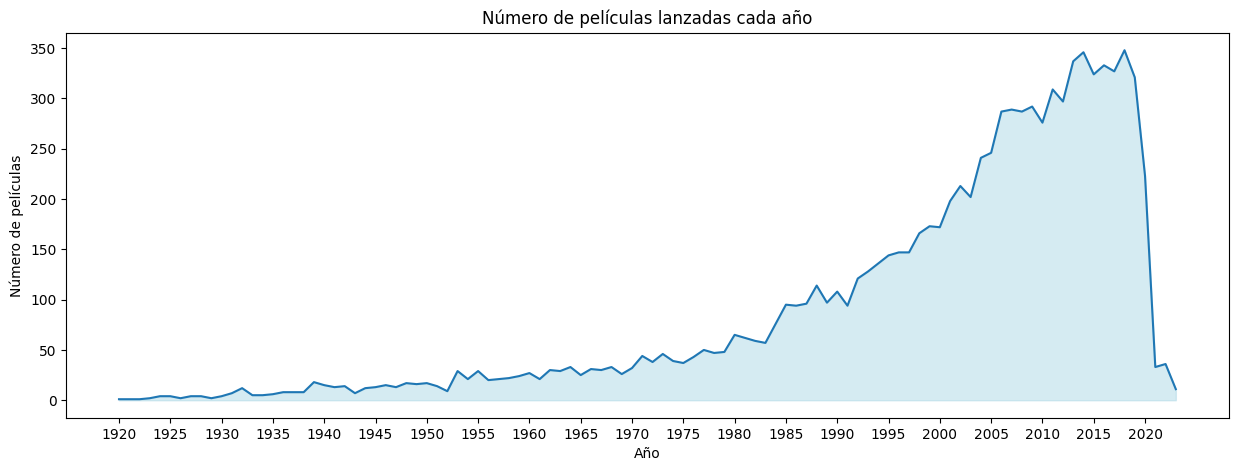

In [5]:
# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Calcular el número de películas lanzadas por año y resetear el índice
movies_released = df.groupby('year').size().reset_index(name='count')

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=movies_released, x='year', y='count', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(movies_released['year'], movies_released['count'], color='lightblue', alpha=0.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2022 - 1920, 5))

# Establecer título y etiquetas de los ejes
plt.title('Número de películas lanzadas cada año')
plt.ylabel('Número de películas')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Se puede observar un crecimiento sostenido a lo largo del tiempo, siendo más pronunciado a partir de la década de los 90. 

Sin embargo, la pandemia provocó un descenso significativo.

**Ingresos Brutos Totales por Año**

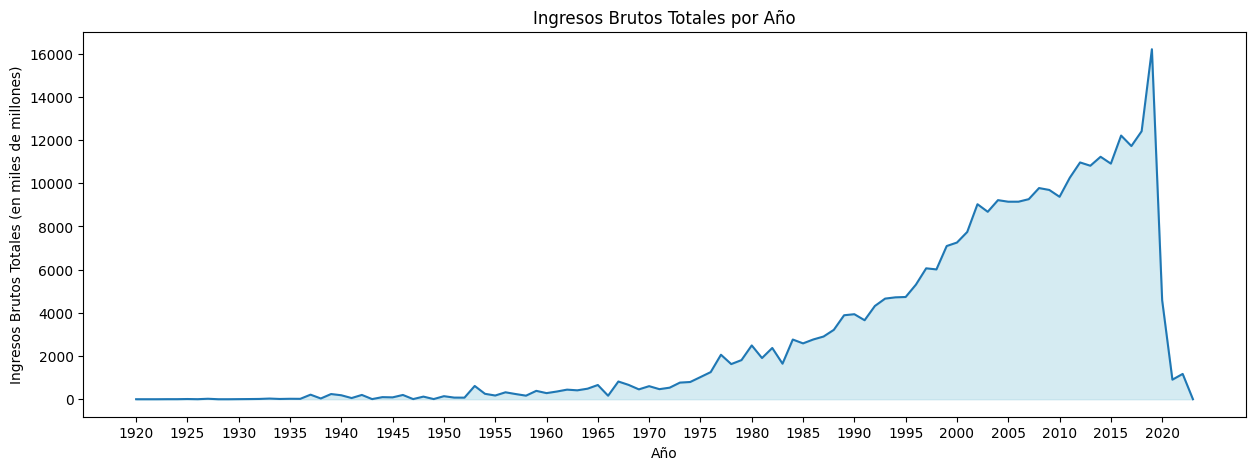

In [6]:


# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Calcular el total de ingresos brutos por año y resetear el índice
total_gross_by_year = df.groupby('year')['gross'].sum().reset_index(name='total_gross')

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=total_gross_by_year, x='year', y='total_gross', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(total_gross_by_year['year'], total_gross_by_year['total_gross'], color='lightblue', alpha=0.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2023 - 1920, 5))

# Establecer título y etiquetas de los ejes
plt.title('Ingresos Brutos Totales por Año')
plt.ylabel('Ingresos Brutos Totales (en miles de millones)')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Un gráfico muy similar al anterior pero en donde se contempla el gigantezco crecimiento en los ingresos brutos en la industria, con el golpe muy duro producido por la pandemia

**Calificación Promedio por año**

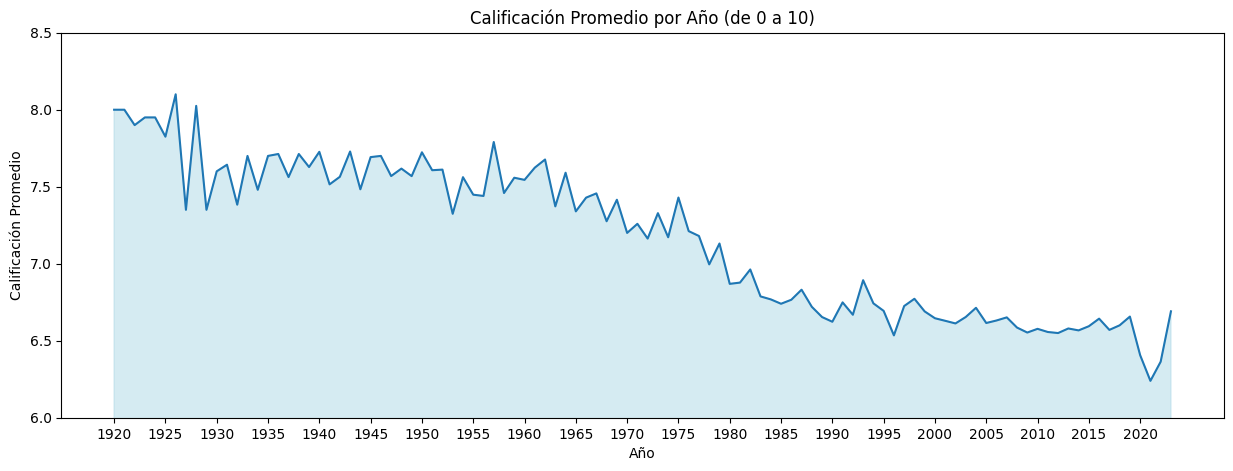

In [12]:

# Calcular la calificación promedio por año y resetear el índice
ave_rating_by_year = df.groupby('year')['rating'].mean().reset_index(name='mean')

# Crear una figura y ejes para el gráfico
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Crear un gráfico de línea con Seaborn
sns.lineplot(data=ave_rating_by_year, x='year', y='mean', ax=axes)

# Rellenar el área debajo de la línea con un color
axes.fill_between(ave_rating_by_year['year'], ave_rating_by_year['mean'], color='lightblue', alpha=0.5)

# Establecer los límites del eje y
axes.set_ylim(6, 8.5)

# Establecer marcas en el eje x para cada 5 años
plt.xticks(np.arange(1920 - 1920, 2023 - 1920, 5))


# Establecer título y etiquetas de los ejes
plt.title('Calificación Promedio por Año (de 0 a 10)')
plt.ylabel('Calificación Promedio')
plt.xlabel('Año')

# Mostrar el gráfico
plt.show()


Desde la década del 60, se puede ver un marcado descenso en los promedios del rating de IMDB. 

Se podría indicar que hay mayor cantidad de peliculas pero con una calidad inferior al menos en el promedio general. 

**Ranking Promedio por década**

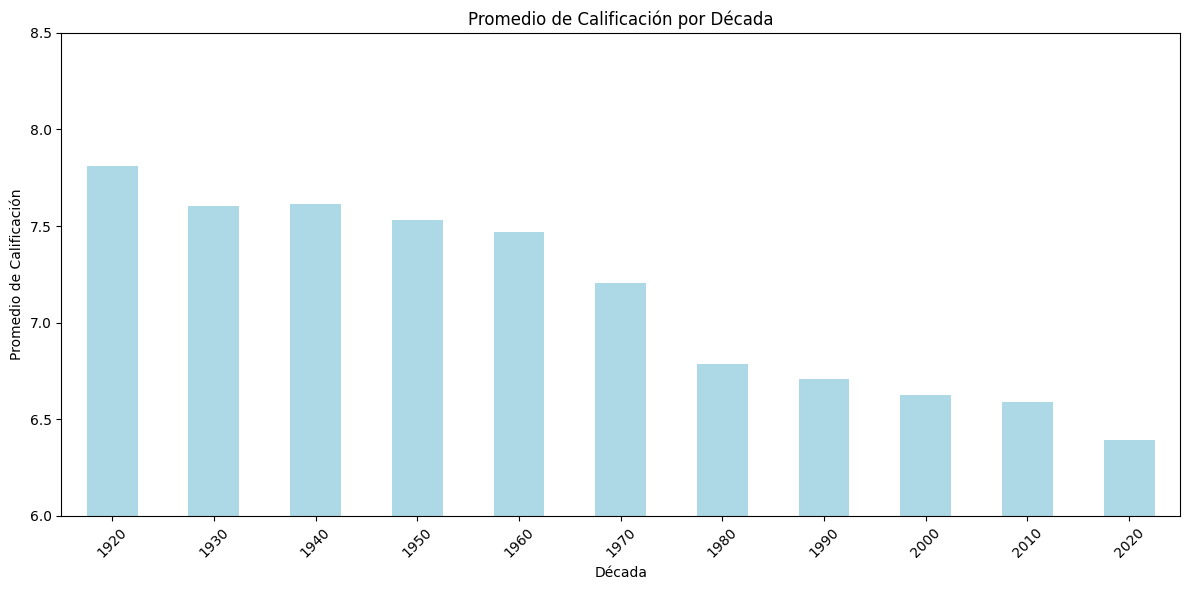

In [13]:
# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Calcular el promedio de calificación por década
average_rating_by_decade = df.groupby('decade')['rating'].mean()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
average_rating_by_decade.plot(kind='bar', color='lightblue')

# Establecer título y etiquetas de ejes
plt.title('Promedio de Calificación por Década')
plt.xlabel('Década')
plt.ylabel('Promedio de Calificación')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Establecer los límites del eje y
plt.ylim(6, 8.5)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

El promedio cae década tras década. La cantidad de peliculas ha aumentado pero sus valores han disminuido con claridad.

A partir de la década del 80, el descenso es aún más marcado.

**Duración de las peliculas**

In [ ]:
movie_data.release_date = pd.to_datetime(movie_data['release_date'])


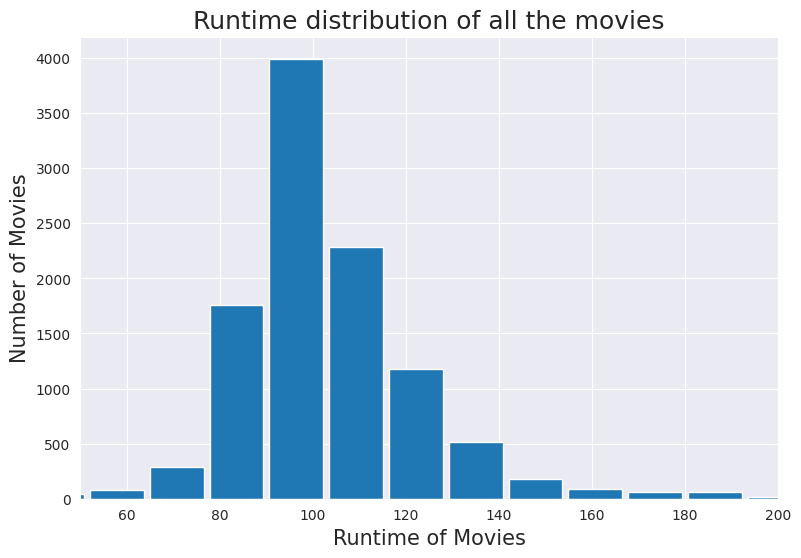

In [ ]:

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiquetas de los ejes
plt.xlabel('Runtime of Movies', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18)

# Histograma con límites personalizados del eje x
plt.hist(movie_data['runtime'], rwidth=0.9, bins=70)
plt.xlim(50, 200)  # Establecer límites del eje x

# Mostrar el gráfico
plt.show()


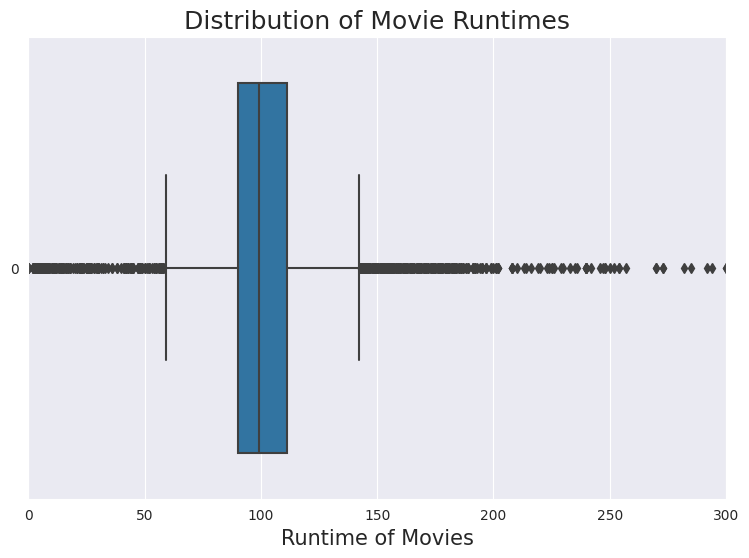

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiqueta del eje x
plt.xlabel('Runtime of Movies', fontsize=15)
plt.title('Distribution of Movie Runtimes', fontsize=18)

# Gráfico de boxplot con orientación horizontal
sns.boxplot(data=movie_data['runtime'], orient='h')
plt.xlim(0, 300)

# Mostrar el gráfico
plt.show()



In [ ]:
# Función para calcular el promedio de una columna en particular
def average_func(column_name):
    return movie_data[column_name].mean()

# Obtenemos la duración promedio de las películas
duracion_promedio = average_func('runtime')

duracion_promedio = round(duracion_promedio)

# Imprimimos el resultado con un mensaje descriptivo
print("La duración promedio de las películas en el conjunto de datos es de aproximadamente", duracion_promedio, "minutos.")

La duración promedio de las películas en el conjunto de datos es de aproximadamente 102 minutos.


**Directores con más peliculas**


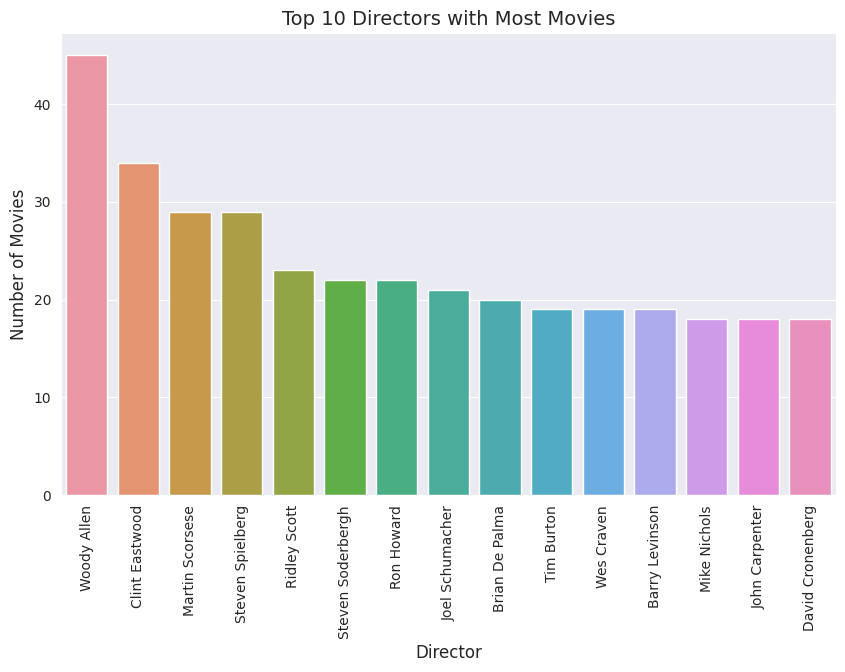

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el número de películas por director
director_counts = movie_data['director'].value_counts().head(15)

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(10, 6))

# Graficar el conteo de películas por director
sns.barplot(x=director_counts.index, y=director_counts.values)

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=90)

# Establecer etiquetas de los ejes y título del gráfico
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Top 10 Directors with Most Movies', fontsize=14)

# Mostrar el gráfico
plt.show()



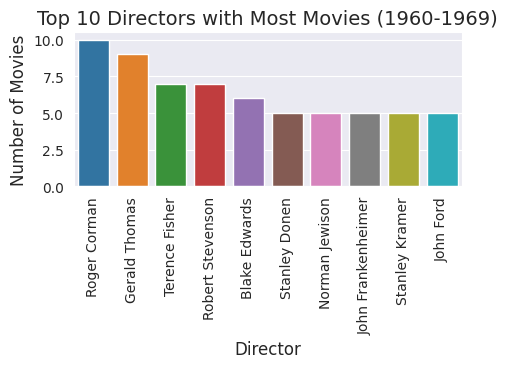

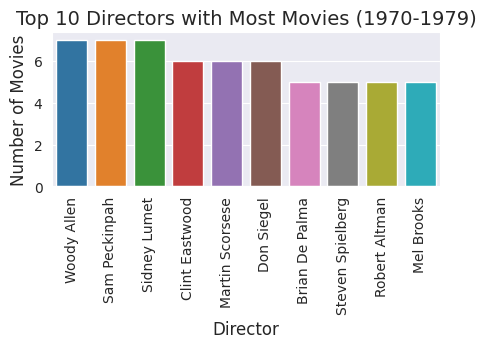

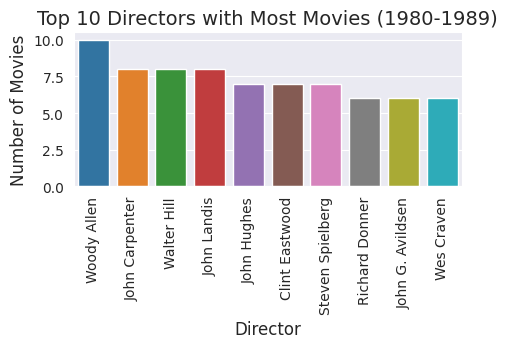

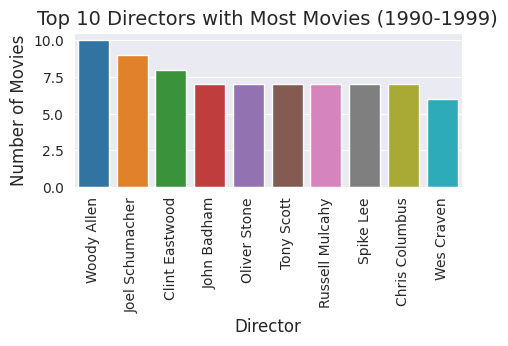

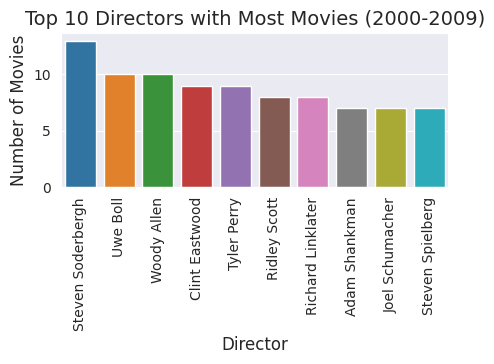

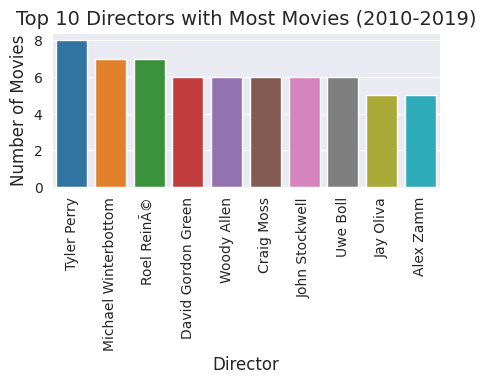

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una nueva columna 'decade' basada en el año de lanzamiento
movie_data['decade'] = (movie_data['release_year'] // 10) * 10

# Filtrar el conjunto de datos para las décadas desde 1950 hasta 2010
decades = range(1950, 2021, 10)
decade_data = movie_data[movie_data['decade'].isin(decades)]

# Configurar estilos y tamaños de fuente
sns.set_style('darkgrid')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear gráficos separados para cada década
for decade in decades:
    # Filtrar los datos para la década actual
    decade_movies = decade_data[decade_data['decade'] == decade]
    
    # Calcular el número de películas por director
    director_counts = decade_movies['director'].value_counts().head(10)
    
    # Verificar si hay datos disponibles para la década actual
    if not director_counts.empty:
        # Crear figura y establecer tamaño
        plt.figure(figsize=(5, 2))
        
        # Graficar el conteo de películas por director
        sns.barplot(x=director_counts.index, y=director_counts.values)
        
        # Rotar las etiquetas del eje x para una mejor visualización
        plt.xticks(rotation=90)
        
        # Establecer etiquetas de los ejes y título del gráfico
        plt.xlabel('Director', fontsize=12)
        plt.ylabel('Number of Movies', fontsize=12)
        plt.title(f'Top 10 Directors with Most Movies ({decade}-{decade+9})', fontsize=14)
        
        # Mostrar el gráfico
        plt.show()


**Voto promedio**

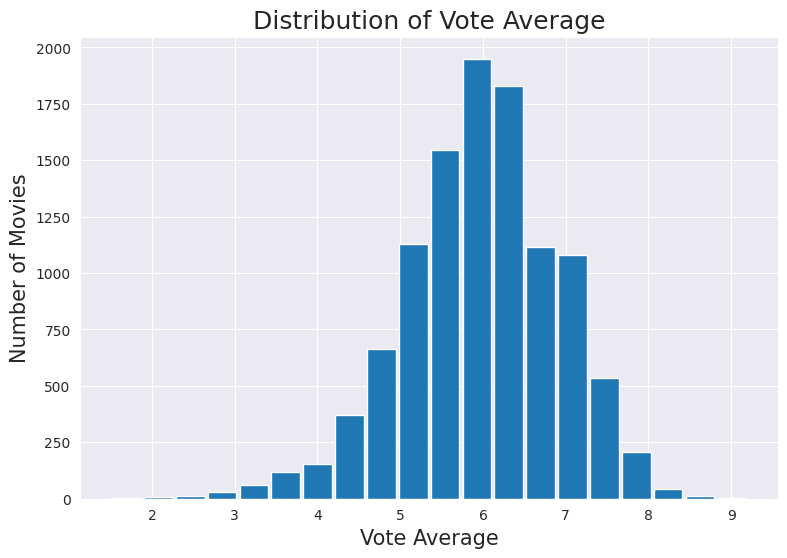

In [ ]:
import matplotlib.pyplot as plt

# Configurar estilos y tamaños de fuente
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiqueta del eje x
plt.xlabel('Vote Average', fontsize=15)
# Etiqueta del eje y
plt.ylabel('Number of Movies', fontsize=15)
# Título del gráfico
plt.title('Distribution of Vote Average', fontsize=18)

# Crear histograma de vote_average
plt.hist(movie_data['vote_average'], bins=20, rwidth=0.9)

# Mostrar el gráfico
plt.show()


**Directores con más puntaje**


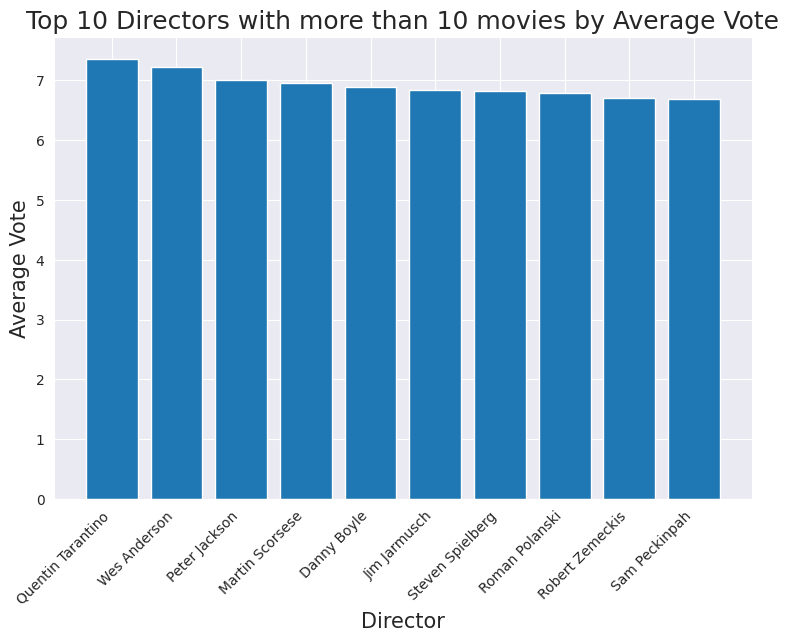

In [ ]:
# Contar el número de películas por director
movie_count_by_director = movie_data['director'].value_counts()

# Filtrar los directores que tienen más de 10 películas
directors_with_more_than_10_movies = movie_count_by_director[movie_count_by_director > 10].index

# Filtrar el DataFrame original solo para los directores seleccionados
filtered_movie_data = movie_data[movie_data['director'].isin(directors_with_more_than_10_movies)]

# Calcular el promedio de votos por director en el DataFrame filtrado
average_vote_by_director = filtered_movie_data.groupby('director')['vote_average'].mean()

# Ordenar los directores en orden descendente según el promedio de votos y seleccionar los 10 mejores
top_10_directors = average_vote_by_director.sort_values(ascending=False).head(10)

# Configurar estilos y tamaños de fuente
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Crear figura y establecer tamaño
plt.figure(figsize=(9, 6), dpi=100)

# Etiquetas del eje x e y
plt.xlabel('Director', fontsize=15)
plt.ylabel('Average Vote', fontsize=15)
# Título del gráfico
plt.title('Top 10 Directors with more than 10 movies by Average Vote', fontsize=18)

# Graficar los 10 mejores directores
plt.bar(top_10_directors.index, top_10_directors.values)

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()



**Generos (se toma de la base complementaria)**

In [22]:
print("Number of subgenres")
print(df['genre'].nunique())
print("")
print(df['genre'].value_counts().head(5))


Number of subgenres
19

Comedy       2397
Action       2142
Drama        1908
Crime         760
Biography     544
Name: genre, dtype: int64


In [23]:
df['genre'] = df['genre'].str.split().str[0]
df['genre'].value_counts().head(5)

Comedy       2397
Action       2142
Drama        1908
Crime         760
Biography     544
Name: genre, dtype: int64

In [24]:
#Le quito las comas a quienes les quedó
df['genre'] = df['genre'].str.replace(',','')
df['genre'].value_counts().head(5)

Comedy       2397
Action       2142
Drama        1908
Crime         760
Biography     544
Name: genre, dtype: int64

**Cantidad de peliculas por género**

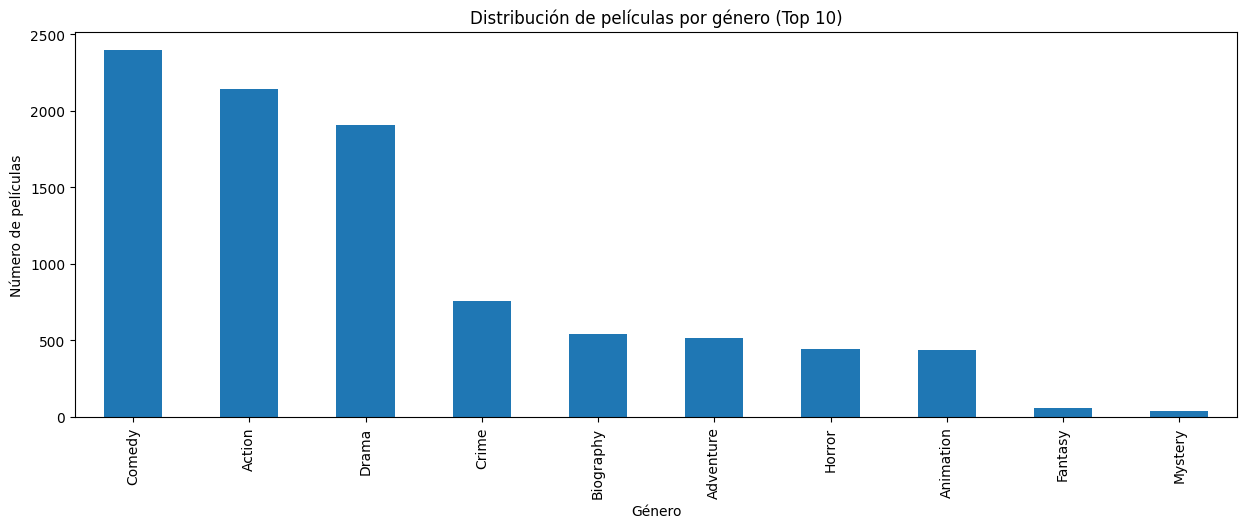

In [15]:
# Gráfico de barras para visualizar la distribución de las películas por género
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Obtener los 10 primeros géneros más comunes
top_10_generos = df['genre'].str.split(',').explode().value_counts().head(10)
top_10_generos.plot(kind='bar', ax=axes)

plt.title('Distribución de películas por género (Top 10)')
plt.xlabel('Género')
plt.ylabel('Número de películas')

# Mostrar el gráfico
plt.show()

En este gráfico se pueden observar los géneros más taquilleros y que suelen aparecer en la pantalla grande.

El género de la animación possee un promedio muy superior al resto, seguido por la acción y la aventura. 

El resto se encuentran en valor más cercanos a los 20 millones por pelicula.

**Géneros más frecuentes en cada década**

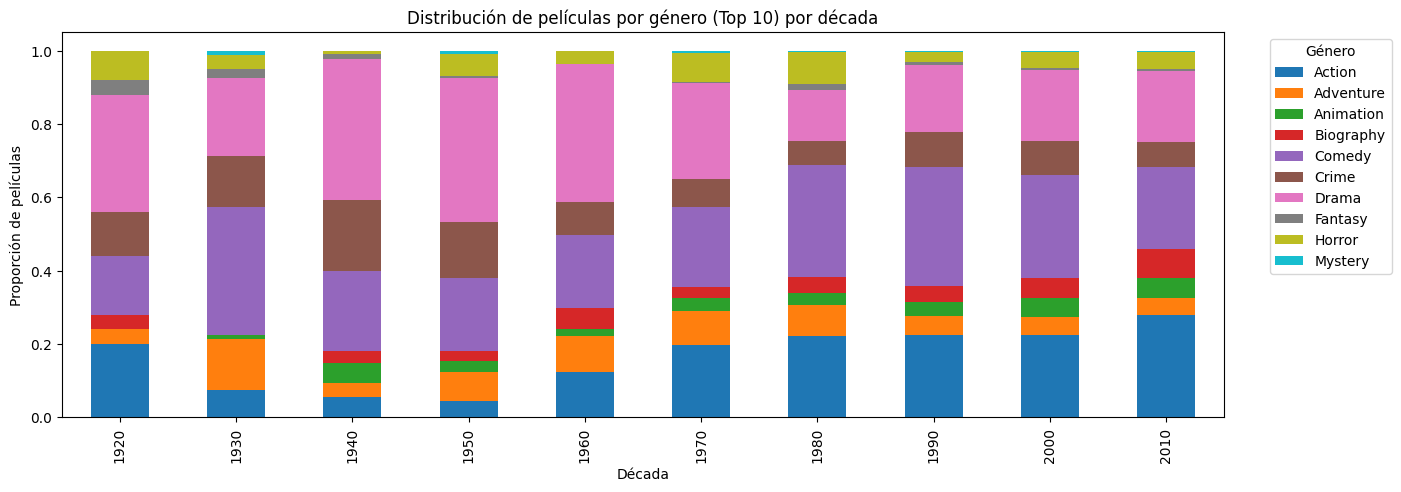

In [16]:

# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Filtrar por géneros más comunes
top_10_generos = df['genre'].str.split(',').explode().value_counts().head(10).index

# Gráfico de barras para visualizar la distribución de las películas por género por década (con filtro)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Obtener la distribución de películas por género para cada década (con filtro)
distribucion_generos_por_decada = df[df['genre'].str.split(',').explode().isin(top_10_generos)]
distribucion_generos_por_decada = distribucion_generos_por_decada.groupby(['decade', 'genre'])['genre'].count().unstack().fillna(0).applymap(int)
distribucion_generos_por_decada = distribucion_generos_por_decada.divide(distribucion_generos_por_decada.sum(axis=1), axis=0).head(10)
distribucion_generos_por_decada.plot(kind='bar', stacked=True, ax=axes)

plt.title('Distribución de películas por género (Top 10) por década')
plt.xlabel('Década')
plt.ylabel('Proporción de películas')
plt.legend(title='Género', loc='upper right', bbox_to_anchor=(1.15, 1))

# Mostrar el gráfico
plt.show()


Este gráfico es muy interesante para ver los cambios que se han producido en cada década en relación a los géneros.

Por ejemplo se puede contemplar que el género de acción ha estado aumentando en cada década. Mientras que la comedia y el drama están disminuyendo.

También puede verse que el género Biografico aumentó en la última década registrada.

**IMDB puntaje en los 10 Generos más populares**

<Figure size 640x480 with 0 Axes>

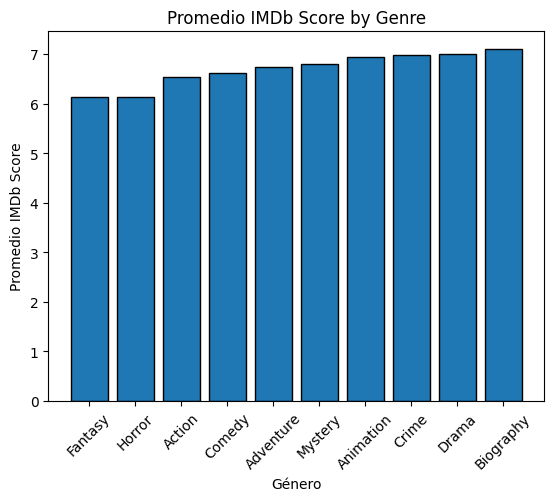

In [17]:
fig=plt.figure()

top_genres = df["genre"].value_counts().head(10)

genres_data = df[df["genre"].isin(top_genres.index)].groupby("genre")["rating"].mean().sort_values()

fig, ax = plt.subplots()
ax.bar(genres_data.index, genres_data.values, edgecolor='black')
ax.set_title('Promedio IMDb Score by Genre')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio IMDb Score')
fig.set_facecolor("white")
plt.xticks(rotation=45)

plt.show()

Podemos ver el puntaje de IMDB de los 10 principales géneros, donde la Biografía posee el mayor promedio de ranking y el terror se encuentra en el último puesto.

**Ranking por género en un diagrama de Box**

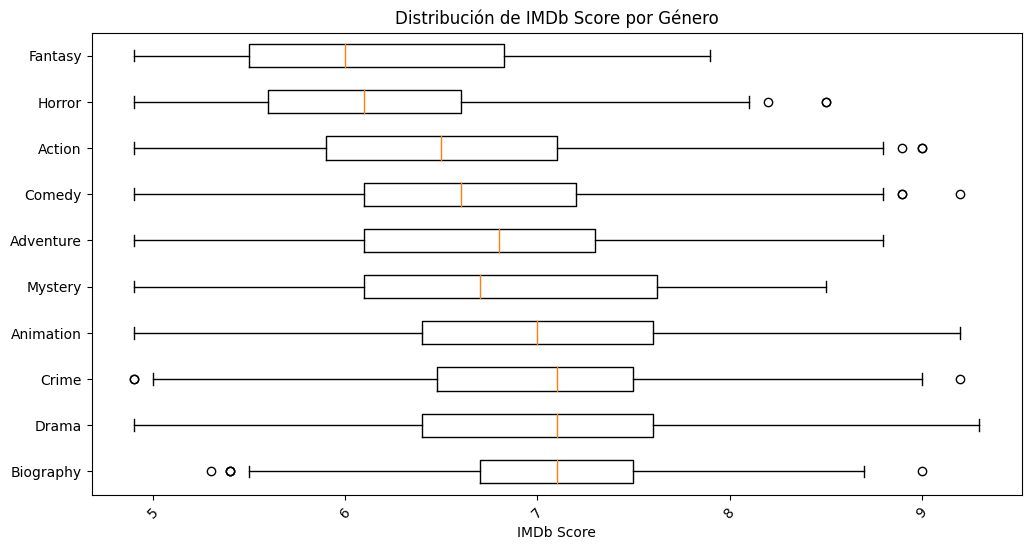

In [18]:

# Filtrar las películas por los 10 géneros más comunes
top_genres = df["genre"].value_counts().head(10)
filtered_df = df[df["genre"].isin(top_genres.index)]

# Calcular el promedio del IMDb Score por género y ordenarlos de mejor a peor
genre_ratings = filtered_df.groupby('genre')['rating'].mean().sort_values(ascending=False)
sorted_genres = genre_ratings.index

# Crear una lista ordenada de DataFrames por género
dataframes_por_genero = [filtered_df[filtered_df['genre'] == genre] for genre in sorted_genres]

# Crear un gráfico de cajas ordenado
plt.figure(figsize=(12, 6))
plt.boxplot([df['rating'] for df in dataframes_por_genero], vert=False)
plt.title('Distribución de IMDb Score por Género')
plt.xlabel('IMDb Score')
plt.yticks(range(1, len(sorted_genres) + 1), sorted_genres)
plt.xticks(rotation=45)

plt.show()



En este gráfico contamos con mayor información, podemos ver la disparidad que posee cada género en relación al ranking.

**Los 10 géneros con mejores puntaje**

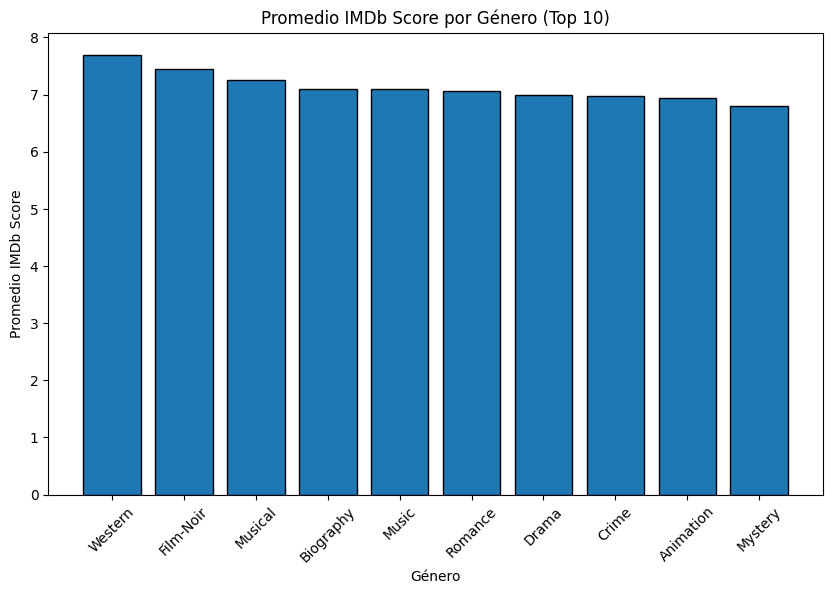

In [19]:

# Calcular el promedio de calificación por género y obtener los 10 géneros con el mejor promedio
top_10_genres_by_rating = df.groupby('genre')['rating'].mean().nlargest(10)

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_genres_by_rating.index, top_10_genres_by_rating.values, edgecolor='black')
ax.set_title('Promedio IMDb Score por Género (Top 10)')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio IMDb Score')
fig.set_facecolor("white")
plt.xticks(rotation=45)

plt.show()

Aqui realizamos el gráfico de los 10 géneros con mejores puntajes, sin importar su popularidad.

**Sistema de calificaciones de peliculas**

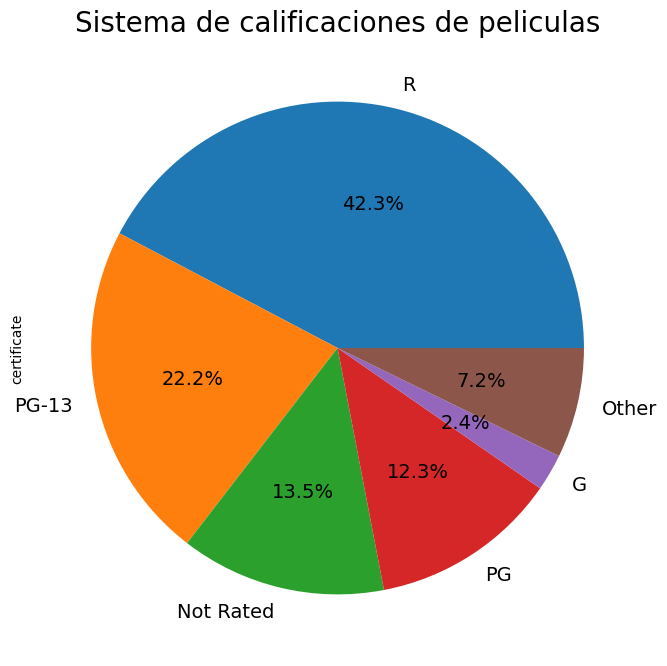

In [20]:
# Pie chart to visualize the distribution of movies by certificate
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.set_facecolor('#FFFFFF')

certificate_counts = df['certificate'].value_counts()

# Label others for better visualization
threshold = 200 # 5%
main_genres = certificate_counts[certificate_counts >= threshold].index
other_genres = certificate_counts[certificate_counts < threshold]
genre_counts_combined = certificate_counts.copy()
genre_counts_combined = genre_counts_combined[main_genres]
genre_counts_combined['Other'] = other_genres.sum()
genre_counts_combined.plot(kind='pie', y='count',  ax=axes, autopct='%1.1f%%', shadow=False, legend = False, fontsize=14)

plt.title('Sistema de calificaciones de peliculas', fontsize=20)
plt.show()

En este gráfico se contemplan la distribución en el sistema de calificación, en donde la categoría R es la más frecuente (Los menores de 17 años deben estar acompañados por un adulto o tutor legal).

Luego continua con PG-13 (Se recomienda la precaución de los padres o adultos).

Hay muchas peliculas Not Rated, pueden ser peliculas antiguas o extranjeras que no pasaron bajo el proceso de calificación de USA.

**Sistema de calificación por década**

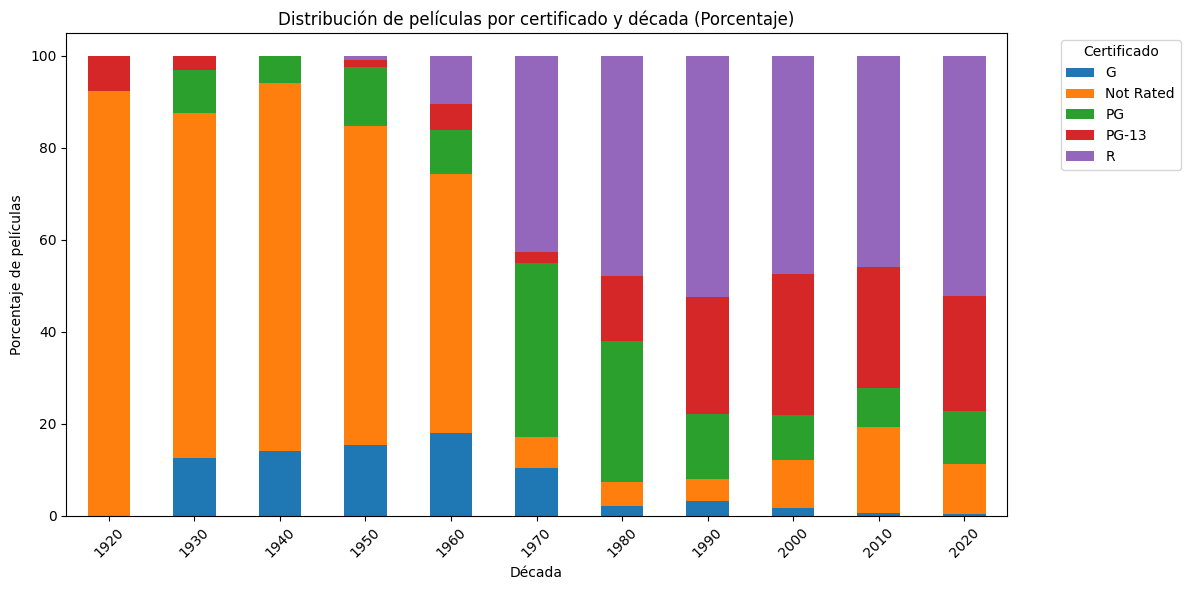

In [21]:

# Asegurarse de que la columna 'year' esté en formato numérico
df['year'] = df['year'].astype(int)

# Crear una columna para representar la década
df['decade'] = (df['year'] // 10) * 10

# Obtener los certificados más comunes
threshold = 200  # Umbral de 200 películas para considerar como "Other"
certificate_counts = df['certificate'].value_counts()
main_certificates = certificate_counts[certificate_counts >= threshold].index

# Filtrar el DataFrame para incluir solo los certificados más comunes y las décadas
df_filtered = df[df['certificate'].isin(main_certificates)]

# Calcular la proporción de películas por certificado y década
certificate_proportions_by_decade = (df_filtered.groupby(['decade', 'certificate']).size() / df_filtered.groupby('decade').size()).unstack(fill_value=0) * 100

# Crear un gráfico de barras apiladas
fig, axes = plt.subplots(figsize=(12, 6))
certificate_proportions_by_decade.plot(kind='bar', stacked=True, ax=axes)

# Establecer título y etiquetas de ejes
plt.title('Distribución de películas por certificado y década (Porcentaje)')
plt.xlabel('Década')
plt.ylabel('Porcentaje de películas')
plt.xticks(rotation=45)
plt.legend(title='Certificado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
